In [1]:
# importing important libraries for the dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
## Read the data set

data = pd.read_csv("E:\Logistic Regression\diabetes.csv")
data.shape

(768, 9)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2.checking the data types

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

3. Dropping irrelevant columns

4. Renaming the columns

5. Dropping the duplicate rows

In [6]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.shape

(768, 9)

check any missing values

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

detecting outliers

<Axes: ylabel='Pregnancies'>

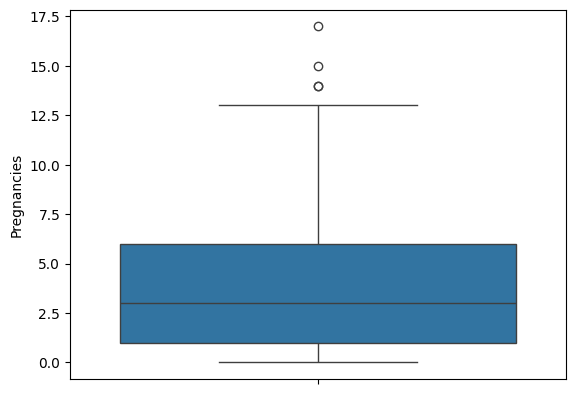

In [10]:
sns.boxplot(data['Pregnancies'])

<Axes: ylabel='Age'>

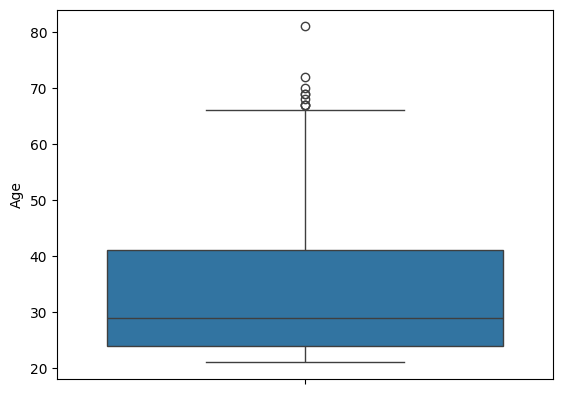

In [11]:
sns.boxplot(data['Age'])

<Axes: ylabel='BMI'>

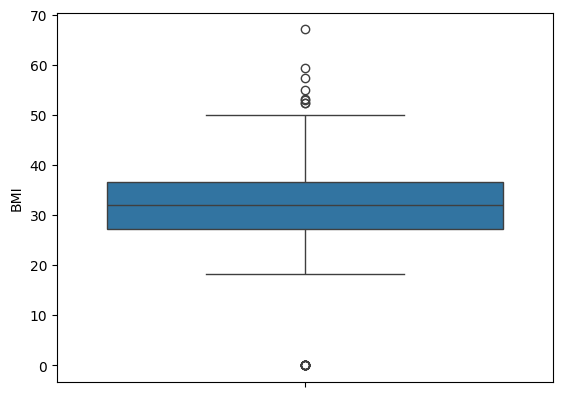

In [12]:
sns.boxplot(data['BMI'])

<Axes: ylabel='BloodPressure'>

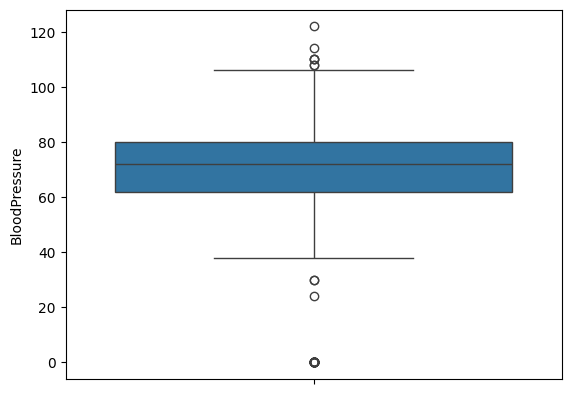

In [13]:
sns.boxplot(data['BloodPressure'])

<Axes: ylabel='Glucose'>

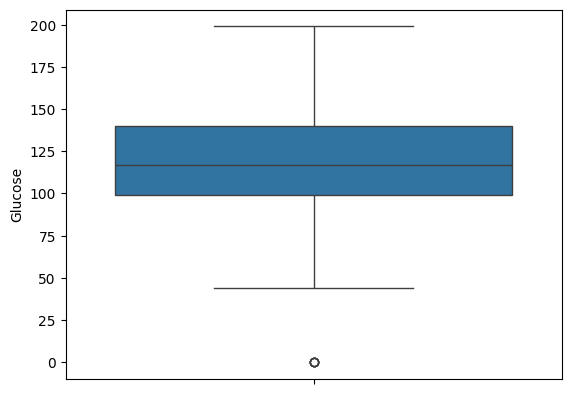

In [14]:
sns.boxplot(data['Glucose'])

<Axes: ylabel='Insulin'>

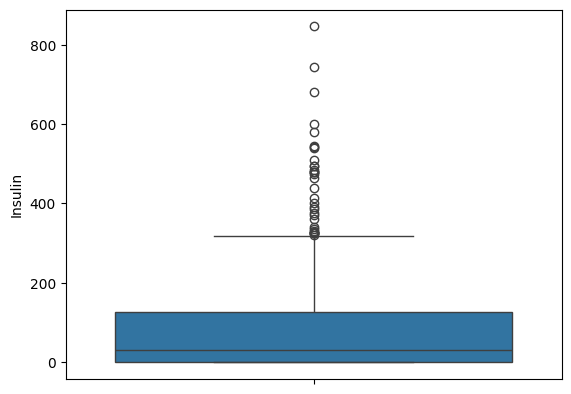

In [15]:
sns.boxplot(data['Insulin'])

<Axes: ylabel='DiabetesPedigreeFunction'>

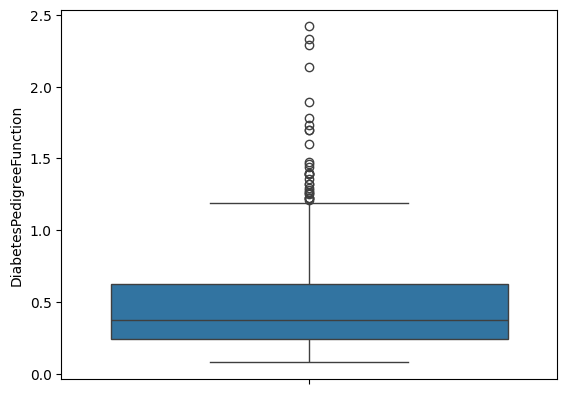

In [16]:
sns.boxplot(data['DiabetesPedigreeFunction'])

<Axes: ylabel='SkinThickness'>

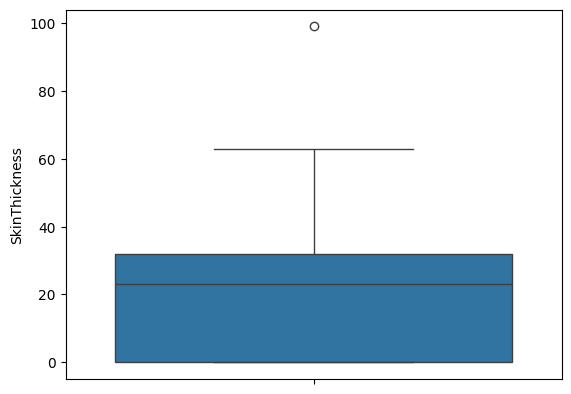

In [17]:
sns.boxplot(data['SkinThickness'])

Summary Statistics

In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above observations we can not conclude glucose and Bp,skin Thickness,Insulin,BMI, all these values are considered to be zero so 

we need to be replaced with median instead of mean, when we check the insulin has most outliers so better to go with median

In [19]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['BMI'] = data['BMI'].replace(0,data['BMI'].median())

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

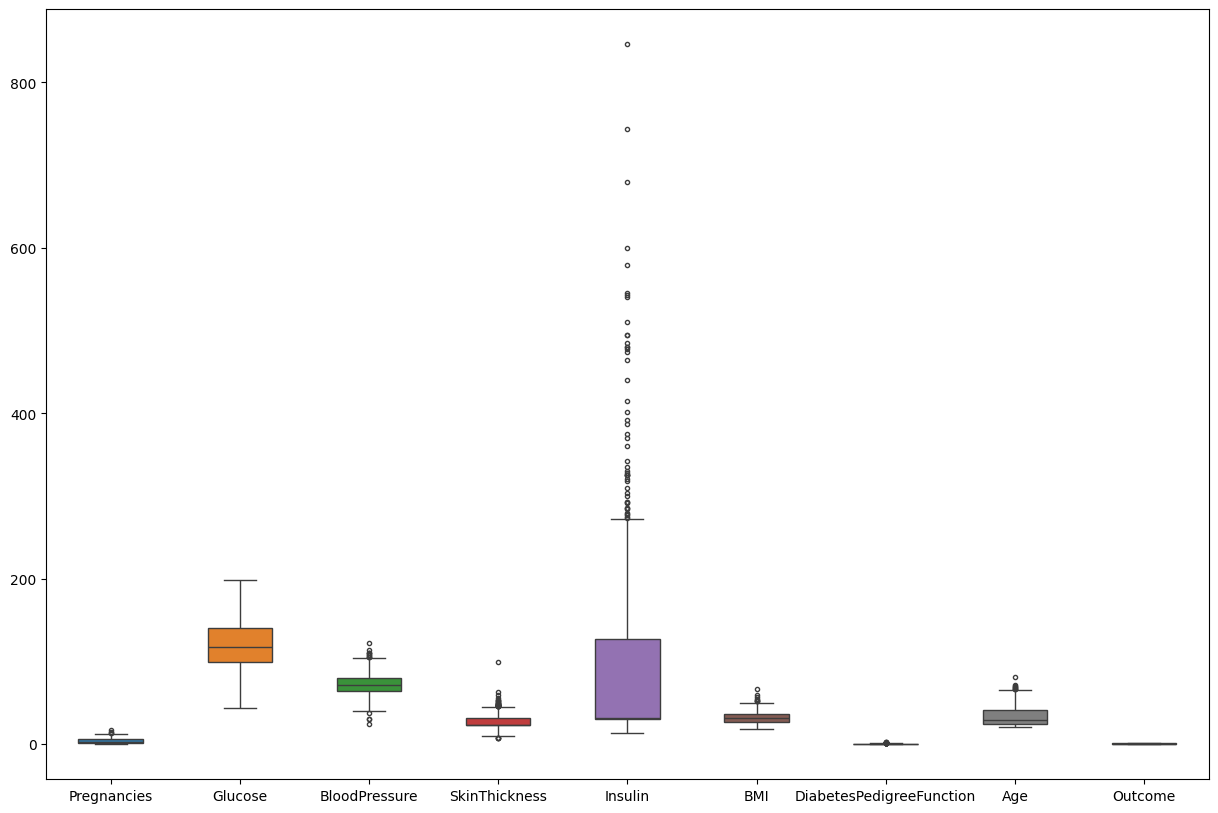

In [21]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width=0.5,ax = ax,fliersize=3)

In [22]:
## Segregate the independent and dependent features

X = data.drop('Outcome',axis=1)

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [24]:
y = data['Outcome']

In [25]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [26]:
## Seperate the train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [28]:
## Standardization

scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))


In [31]:
logistic = LogisticRegression()

In [54]:
logistic.fit(X_train_scaled,y_train)

LogisticRegression()

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters = {
    'penalty':['l1','l2'],
    'C': np.logspace(-3, 3, 7),
    'solver':['newton','lbfgs','liblinear'],
}

In [57]:
logistic = LogisticRegression()
clf = GridSearchCV(logistic,param_grid=parameters,scoring='accuracy',cv =10)

In [58]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [59]:
clf.best_params_

{'C': np.float64(0.1), 'penalty': 'l1', 'solver': 'liblinear'}

In [60]:
clf.best_score_

np.float64(0.780188679245283)

In [61]:
y_pred = clf.predict(X_test_scaled)

In [62]:
confusion = confusion_matrix(y_test,y_pred)

In [63]:
print(confusion)

[[123  28]
 [ 34  46]]


In [64]:
true_positive = confusion[0][0]
False_Positive = confusion[0][1]
False_Negative = confusion[1][0]
true_Negative = confusion[1][1]

In [65]:
Acc = (true_positive + true_Negative) / (true_positive + true_Negative + False_Negative + False_Positive)

In [66]:
print(Acc)

0.7316017316017316


In [67]:
precision = true_positive / (true_positive + False_Positive)

In [68]:
precision

np.float64(0.8145695364238411)

In [69]:
recall = true_positive / (true_positive + False_Negative)

In [70]:
recall

np.float64(0.7834394904458599)

In [71]:
f1score = 2 * (recall * precision) / (recall + precision)

In [72]:
f1score

np.float64(0.7987012987012987)

In [73]:
from sklearn.linear_model import LogisticRegression
import pickle

# Train the logistic regression model
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)  # Replace X_train and y_train with your training data

# Save the trained model to a file
with open("E:\Logistic Regression\Models\logistic.pkl", "wb") as file:
    pickle.dump(logistic, file)


In [74]:
import pickle

# Load the logistic regression model
with open("E:\Logistic Regression\Models\logistic.pkl", "rb") as file:
    logistic = pickle.load(file)


In [75]:
from sklearn.utils.validation import check_is_fitted
import sklearn

# Ensure the object is a LogisticRegression instance
if not isinstance(logistic, sklearn.linear_model.LogisticRegression):
    raise ValueError("Loaded model is not a LogisticRegression instance!")

# Check if the model is fitted
try:
    check_is_fitted(logistic)
    print("Model is fitted and ready to use.")
except sklearn.exceptions.NotFittedError:
    print("Model is not fitted.")


Model is fitted and ready to use.
